# Predicting Telecom Customer Churn: A Data-Driven Strategy to Retain Users


## Introduction

Customer churn is a critical challenge in the telecommunications industry, with annual churn rates ranging from 20% to 50%, according to a 2024 CustomerGauge study. In a highly competitive market, losing customers directly impacts revenue and long-term growth—especially since acquiring a new customer typically costs 6–7 times more than retaining an existing one.
These realities highlight the importance of understanding why customers leave, how churn can be measured, and which strategies are most effective in reducing it. The churn rate is a key performance metric used to evaluate customer retention, service quality, and overall business health.
In the telecom sector, churn generally falls into two categories:

- Voluntary Churn: Occurs when customers intentionally cancel their services, often due to dissatisfaction with pricing, network quality, customer service, or more attractive offers from competitors. For example, a subscriber may switch to a rival provider offering cheaper or faster 5G plans.
  
- Involuntary Churn: Results from non-customer-driven factors such as payment failures, expired credit cards, fraud detection, or account suspensions. While less visible, involuntary churn still contributes significantly to revenue loss if not proactively managed.

  
By analyzing churn behavior, telecom providers can move from reactive retention efforts to data-driven, proactive customer engagement strategies.

## Objective

The primary objective of this telecom churn analysis is to identify patterns and key drivers of customer churn using machine learning algorithms such as Logistic Regression, Random Forest, Gradient Boosting, and XGBoost. These models will help predict customers who are most likely to churn, enabling telecom companies to take timely and targeted retention actions.

Specifically, the analysis aims to support the following business strategies:
-  Enhanced Customer Support: Leveraging churn predictions to prioritize at-risk customers and provide proactive, omnichannel support (phone, chat, email, and social media) with 24/7 availability to reduce frustration and service-related churn.
  
- Personalized Offerings: Designing customized plans based on customer usage patterns, for example, high-data plans for heavy streamers or discounted call packages for frequent callers—to improve satisfaction and loyalty.

  
- Loyalty Programs: Implementing rewards such as discounts, exclusive content, or long-term customer benefits to incentivize retention and strengthen customer relationships.


- Real-Time Usage Alerts: Sending notifications for data consumption or billing thresholds to prevent unexpected charges and improve transparency, thereby reducing dissatisfaction-driven churn.
Overall, this project seeks to demonstrate how predictive analytics and machine learning can transform churn management from a cost center into a strategic advantage for telecom providers.

## Dataset

The dataset consists of Services that each customer has signed up for (phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies), customer account information (how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges) and demographic information about customers (gender, age range, and if they have partners and dependents).


In [10]:
!cd

C:\Users\abadi\Documents\Projects


# Load the dataset

In [91]:
# import necessary  libraries 

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support




In [94]:
df = pd.read_csv("C:\\Users\\abadi\Downloads\\archive (1)\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [95]:
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [96]:
print(df.shape)

(7043, 21)


# Data Exploration (EDA)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [99]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Churn Distribution 
- Lets understand first the distribution of churned vs not churned 

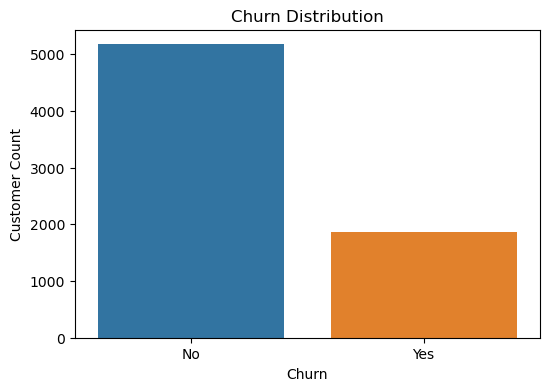

Churn Rate (%)
 No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


In [101]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.ylabel('Customer Count')
plt.show()
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%)\n", churn_rate)

# Insights : 
- The churn distribution is highly imbalanced(73% No vs 27% Yes), so we need to address this t later using SMOTE or class weighting.

In [103]:
pd.crosstab(df['Contract'], df['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [104]:
df['Contract'].value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [105]:
# lets see the percentage of customers who churned under each contract type

churn_by_contract = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
churn_by_contract = churn_by_contract.round(2)


In [106]:
print("Churn rate by contract type (%):")
print(churn_by_contract)

Churn rate by contract type (%):
Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


 # Visualize churn by contract type

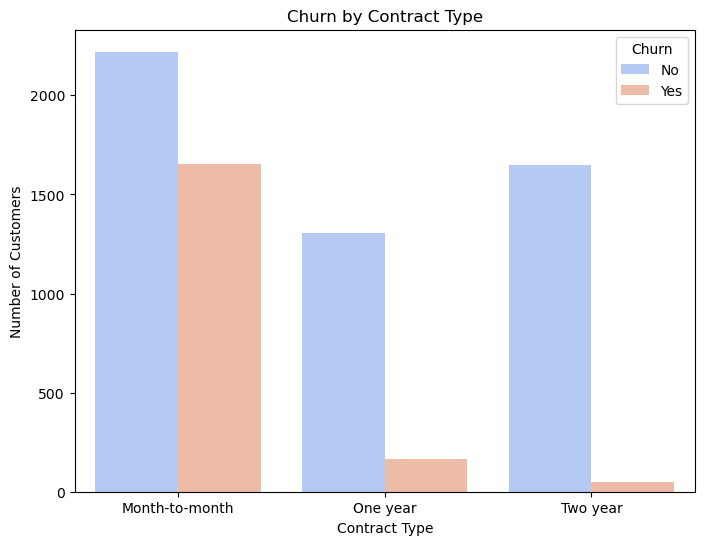

In [108]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


 # Interpretation: 
 - According the abouve count plot  and crosstab

 - Month-to-month contracts have much higher churn counts.

- Two-year contracts have very low churn because customers are locked with the company  

In [110]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)  # Drop rows with missing TotalCharges

# Churn by Monthly Charges:
- To see whether higher-paying customers churn more.

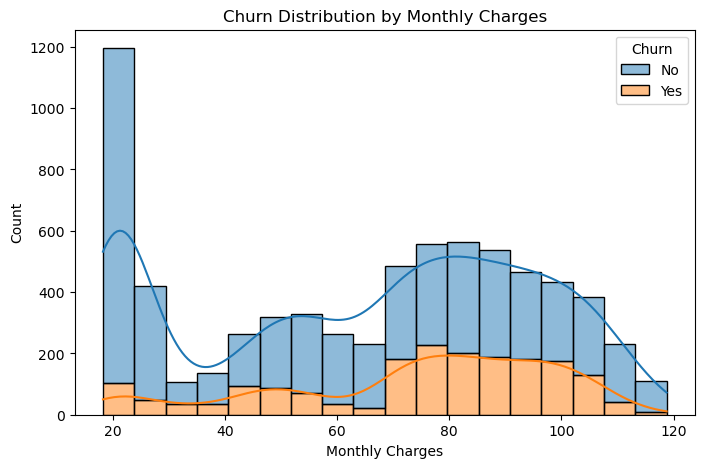

In [112]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, multiple='stack')
plt.title('Churn Distribution by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

# Interpretation:
- Churn is higher at higher MonthlyCharges, which indicates price sensitivity.

- If churn occurs at lower MonthlyCharges, it might be due to service dissatisfaction instead.

# Identify Key Churn Drivers Visually

We'll create multi-feature comparisons to find potential churn drivers.

- Heatmap of Correlations (Numerical Features Only)
- Violin Plot for MonthlyCharges
- Tenure vs Churn

In [115]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

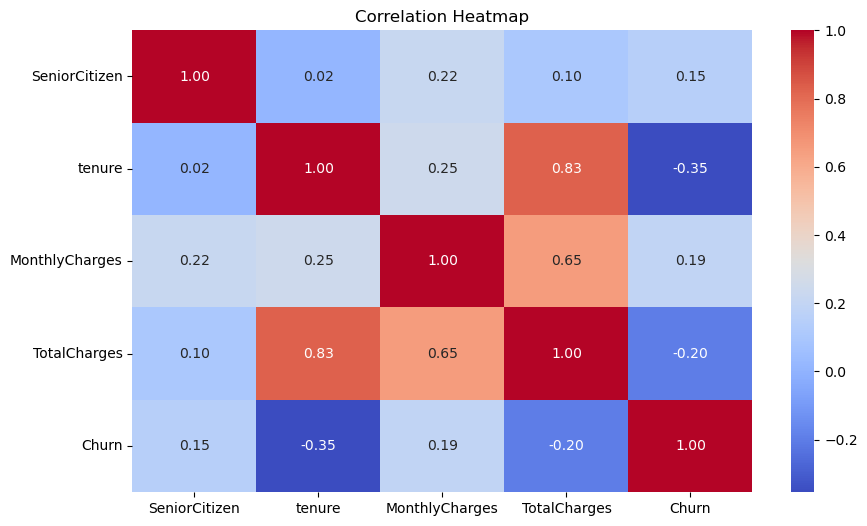

In [116]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Interpretation: 
* Churn vs Tenure (Negative Correlation, -0.35)

- Longer-tenured customers are less likely to churn.

- Newer customers are at higher risk of leaving.

* Insight: Focus retention efforts on new customers

- Churn vs MonthlyCharges (Positive Correlation, 0.19)

- Customers paying higher monthly fees are more likely to churn.

* Insight: Consider targeted promotions or flexible plans for high-paying customers.
  
* Churn vs TotalCharges (Negative Correlation, -0.20)

  - Customers with higher total charges are generally less likely to churn.

** Key Takeaways

- Main drivers of churn: MonthlyCharges (positive) and Tenure/TotalCharges (negative).

- TotalCharges is a loyalty indicator: Higher total spending → less likely to churn.

** Retention focus: New customers and high-paying customers are most at risk.
 

# Violin Plot for MonthlyCharges
- Shows distribution and density by churn.

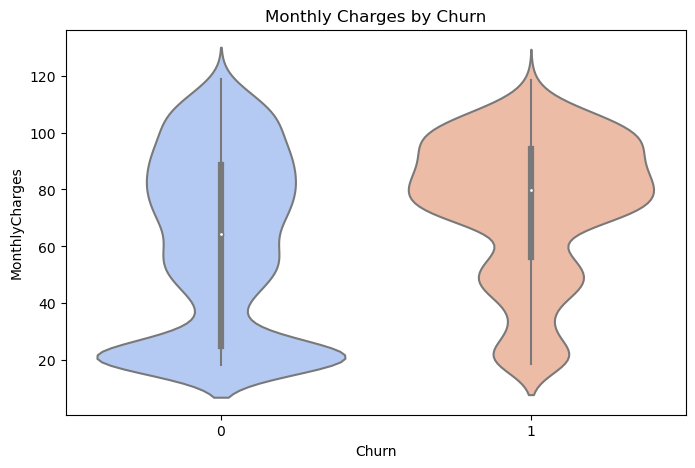

In [119]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges by Churn')
plt.show()

# Interpretation:
- Churn = Yes: The violin  shifted towards higher MonthlyCharges indicates hat customers who churn tend to pay higher monthly fees
- Churn = No: the violin centered at lower MonthlyCharges indicates most loyal customers pay moderate or lower monthly fees.


# Tenure vs Churn
- Longer-tenured customers usually churn less

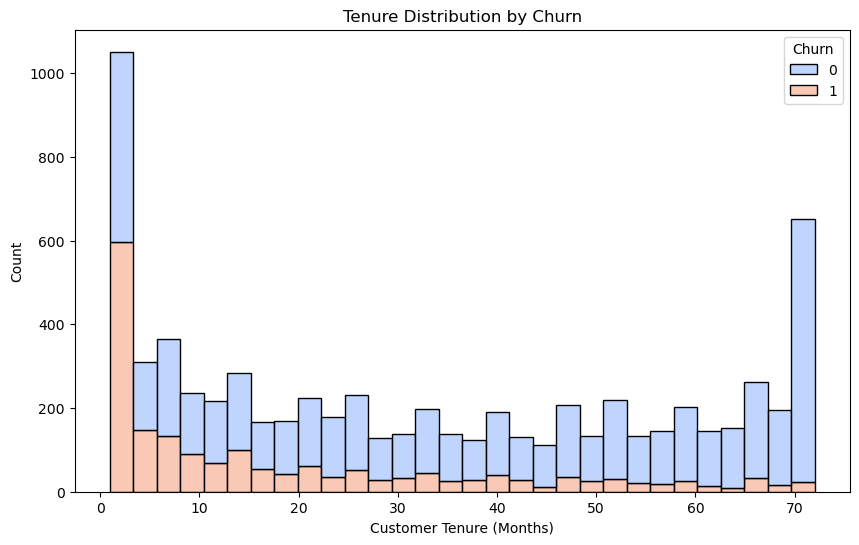

In [122]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette='coolwarm')
plt.title("Tenure Distribution by Churn")
plt.xlabel("Customer Tenure (Months)")
plt.ylabel("Count")
plt.show()

# Data Preprocessing
- Handle data types
- Handle missing values
- Encode categorical variables
- Feature engineering 


In [124]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [125]:
# Check for nulls
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [126]:
# handling missing values
df = df.dropna(subset=['TotalCharges'])

In [127]:
df['TotalCharges'].isnull().sum()

0

In [128]:
df['Churn'].isnull().sum()

0

In [129]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [130]:
df.to_csv("churn_cleaned.csv", index=False)

In [131]:
# import os
# os.getcwd()

In [132]:
# Label Encode Target Column

df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [133]:
print(df['Churn'].unique())

[0 1]


In [134]:
# Separate CustomerID for later use
customer_ids = df["customerID"]

In [143]:
# Drop Irrelevant Columns
df.drop('customerID', axis=1,inplace=True)

In [145]:
#cat_cols = df.drop(columns=['Churn']).select_dtypes(include='object').columns
#df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [147]:
# One-Hot Encode Categorical Features

cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [149]:
print(" Final dataset shape:", df.shape)

 Final dataset shape: (7032, 31)


In [151]:

df.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# Feature Engineering
- Create Tenure Groups
- High monthly charges flag


In [154]:
# Create tenure groups
bins = [0, 12, 24, 48, 72]
labels = ['0-12', '13-24', '25-48', '49-72']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels)

In [156]:
 # High monthly charges flag
df['HighCharges'] = (df['MonthlyCharges'] > 80).astype(int)

In [158]:

tenure_mapping = {
    '0-12': 0,
    '13-24': 1,
    '25-48': 2,
    '49-72': 3
}
df['TenureGroup_encoded'] = df['TenureGroup'].map(tenure_mapping)

# Scale Numerical Features:
- helps some models (Logistic Regression, SVM) converge faster and improve performance.

In [168]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges','TenureGroup_encoded']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [170]:
df.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup,HighCharges,TenureGroup_encoded
0,0,-1.280248,-1.161694,-0.994194,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0-12,0,-1.267941
1,0,0.064303,-0.260878,-0.173740,0,1,0,0,1,0,...,0,1,0,0,0,0,1,25-48,0,0.363711
2,0,-1.239504,-0.363923,-0.959649,1,1,0,0,1,0,...,0,0,0,1,0,0,1,0-12,0,-1.267941
3,0,0.512486,-0.747850,-0.195248,0,1,0,0,0,1,...,0,1,0,0,0,0,0,25-48,0,0.363711
4,0,-1.239504,0.196178,-0.940457,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0-12,0,-1.267941


# Model building

In [189]:
X = df.drop(['Churn', 'TenureGroup'], axis=1)
y = df['Churn']

In [193]:
# Train-Test Split
X_train, X_test, y_train, y_test,customer_ids_train, customer_ids_test = train_test_split(X, y, customer_ids,
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)


# Handle Imbalanced Classes (Training Set Only)
- balance the training set using SMOTE

In [197]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())

Before SMOTE: 0    4130
1    1495
Name: Churn, dtype: int64
After SMOTE: 0    4130
1    4130
Name: Churn, dtype: int64


In [199]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb.fit(X_train_res, y_train_res)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# Model Evaluation :
- We evaluate using the original imbalanced test set so we know how the model will perform in real-world conditions.

--- Logistic Regression ---
ROC-AUC Score: 0.8256971802185626
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.51      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



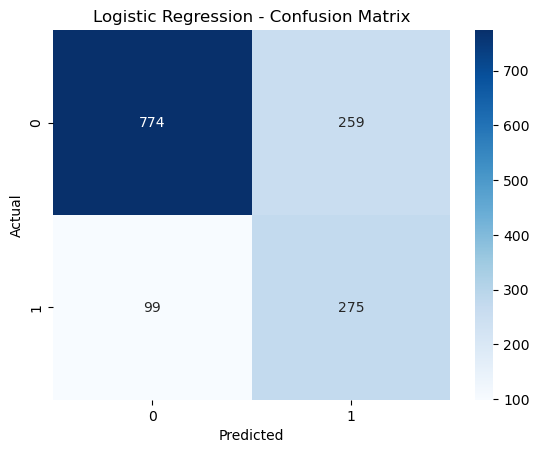

--- Random Forest ---
ROC-AUC Score: 0.8177948553354282
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.62      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.77      1407



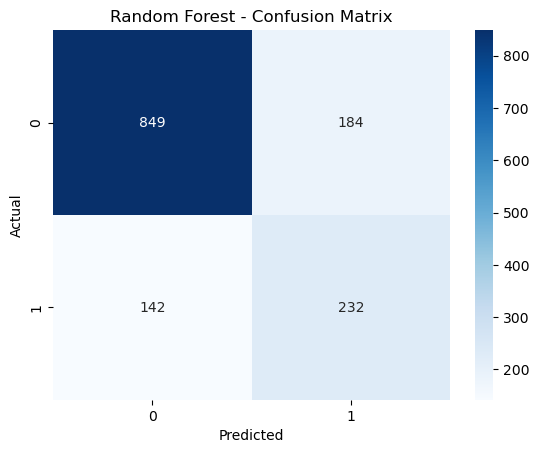

--- Gradient Boosting ---
ROC-AUC Score: 0.8254810504682379
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.53      0.72      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407



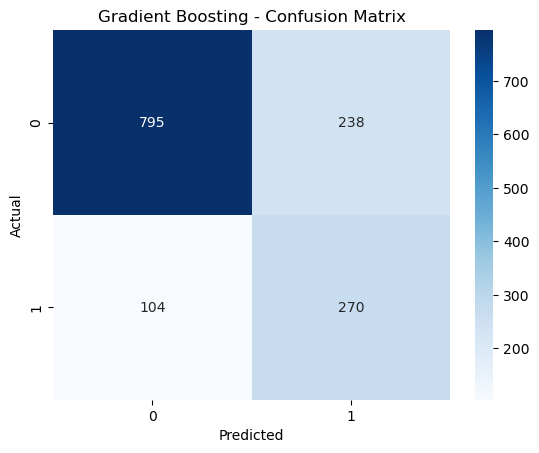

--- XGBoost ---
ROC-AUC Score: 0.8129157585765979
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407



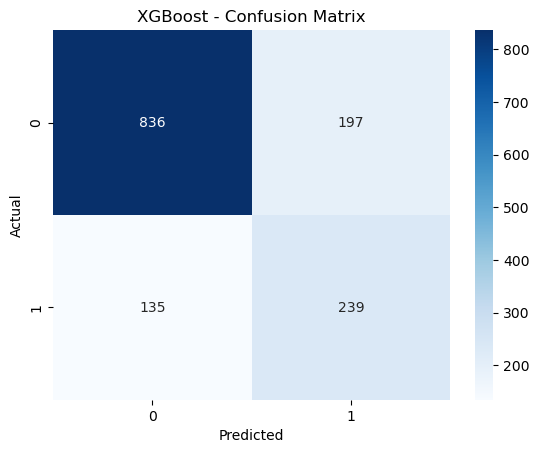

In [201]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"--- {model_name} ---")
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Evaluate each model
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(gb, X_test, y_test, "Gradient Boosting")
evaluate_model(xgb, X_test, y_test, "XGBoost")


In [202]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "XGBoost": xgb
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    results.append({
        'Model': name,
        'ROC-AUC': roc_auc_score(y_test, y_prob),
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
print(results_df)

                 Model   ROC-AUC  Precision    Recall  F1-Score
0  Logistic Regression  0.825697   0.514981  0.735294  0.605727
2    Gradient Boosting  0.825481   0.531496  0.721925  0.612245
1        Random Forest  0.817795   0.557692  0.620321  0.587342
3              XGBoost  0.812916   0.548165  0.639037  0.590123


# Summary & Recommendation
* ROC-AUC measures how well the model distinguishes churners (1) from non-churners (0).
- Logistic Regression which is 0.8257 best at separating churners vs non-churners.
* Precision (How Accurate Positive Predictions Are): Of all customers predicted to churn, how many actually churned?:
   Random Forest is most precise which is 0.5529 which means  fewer false alarms when predicting churn.
   Random Forest is best if you want to minimize wasted retention efforts, i.e., fewer loyal customers wrongly flagged as churners.
* Recall (How Many Actual Churners Were Found): Of all actual churners, how many were correctly identified?
- Logistic Regression which is 0.7353 best at catching churners: detects 73.5% of actual churners
* F1-Score(Harmonic mean of precision and recall): Gradient Boosting = 0.6169 best overall balance between catching churners and avoiding false positives. therefore Gradient Boosting has the most balanced performance overall.

**If your business cares more about catching every possible churner, choose Logistic Regression (high recall).**

**If your business wants to reduce wasted retention spending, choose Random Forest (high precision).**

**If you want a balanced solution, choose Gradient Boosting, as it has the highest F1-Score.**

In [204]:
results_df.to_csv("model_performance.csv", index=False)

In [211]:
predictions = gb.predict(X_test)
probabilities = gb.predict_proba(X_test)[:, 1]

In [215]:
predictions_df = pd.DataFrame({
    "CustomerID": customer_ids_test,
    "Predicted_Churn": predictions,
    "Churn_Probability": probabilities
})

In [219]:
predictions_df.to_csv('churn_predictions.csv', index=False)